In [1]:
!pip install -U --upgrade pip


  Using cached pip-24.0-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 22.3.1
    Uninstalling pip-22.3.1:
      Successfully uninstalled pip-22.3.1


In [ ]:
!pip install -U pandas

!pip install -U csv

!pip install -U glob

In [3]:
import pandas as pd
import glob
import matplotlib as plt

/srv/conda/envs/notebook/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
data_directory = "./"
csv_files = glob.glob(data_directory + "*.csv")
csv_files

['./ANL-ALCF-DARSHAN-THETA_20190101_20191231.csv',
 './ANL-ALCF-DARSHAN-THETA_20170701_20171231 (1).csv']

In [5]:
dfs = []
for file in csv_files:
    if file.endswith('.gz'):
        df = pd.read_csv(file, compression='gzip')
    else:
        df = pd.read_csv(file)
    dfs.append(df)

In [6]:
df = pd.concat(dfs, ignore_index=True)

In [7]:
print(df.head())


  MACHINE_NAME  COBALT_JOBID  RUN_DATE_ID  USER_ID  EXE_NAME_GENID  \
0        theta        299926     20190101    33782  53338749964413   
1        theta        299887     20190101    33782  53338749964413   
2        theta        299926     20190101    33782  53338749964413   
3        theta        299926     20190101    33782  53338749964413   
4        theta        299760     20190101    33782  53338749964413   

   START_TIME    END_TIME  NPROCS  RUN_TIME  DARSHAN_LOG_VERSION  ...  \
0  1546360827  1546364408      48      3582                  3.1  ...   
1  1546315376  1546334650      48     19275                  3.1  ...   
2  1546360883  1546364468      48      3586                  3.1  ...   
3  1546360793  1546364395      48      3603                  3.1  ...   
4  1546301701  1546304193      48      2493                  3.1  ...   

  TOTAL_STDIO_F_READ_START_TIMESTAMP  TOTAL_STDIO_F_OPEN_END_TIMESTAMP  \
0                                0.0                              

In [8]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177497 entries, 0 to 177496
Columns: 187 entries, MACHINE_NAME to UPDATED_TIMESTAMP
dtypes: float64(48), int64(136), object(3)
memory usage: 253.2+ MB
None


In [9]:
print(df.describe())


        COBALT_JOBID   RUN_DATE_ID        USER_ID  EXE_NAME_GENID  \
count  177497.000000  1.774970e+05  177497.000000    1.774970e+05   
mean   286036.801907  2.018567e+07   31993.781557    4.687777e+13   
std     85306.896740  8.362595e+03    5361.099767    2.337059e+13   
min    106782.000000  2.017070e+07     247.000000    2.011638e+10   
25%    299926.000000  2.019010e+07   32451.000000    3.244890e+13   
50%    310041.000000  2.019021e+07   33151.000000    5.325444e+13   
75%    331879.000000  2.019042e+07   33782.000000    5.712736e+13   
max    398220.000000  2.019123e+07   34734.000000    9.999690e+13   

         START_TIME      END_TIME         NPROCS       RUN_TIME  \
count  1.774970e+05  1.774970e+05  177497.000000  177497.000000   
mean   1.544725e+09  1.544726e+09    2570.312118    1654.722153   
std    2.191542e+07  2.191560e+07   11052.502887    4664.075946   
min    1.498870e+09  1.498891e+09       1.000000       1.000000   
25%    1.546365e+09  1.546370e+09      64.0

In [10]:
column_names = df.columns.tolist()
print(column_names)

['MACHINE_NAME', 'COBALT_JOBID', 'RUN_DATE_ID', 'USER_ID', 'EXE_NAME_GENID', 'START_TIME', 'END_TIME', 'NPROCS', 'RUN_TIME', 'DARSHAN_LOG_VERSION', 'DARSHAN_LIB_VERSION', 'TOTAL_POSIX_OPENS', 'TOTAL_POSIX_READS', 'TOTAL_POSIX_WRITES', 'TOTAL_POSIX_SEEKS', 'TOTAL_POSIX_STATS', 'TOTAL_POSIX_MMAPS', 'TOTAL_POSIX_FSYNCS', 'TOTAL_POSIX_FDSYNCS', 'TOTAL_POSIX_MODE', 'TOTAL_POSIX_BYTES_READ', 'TOTAL_POSIX_BYTES_WRITTEN', 'TOTAL_POSIX_MAX_BYTE_READ', 'TOTAL_POSIX_MAX_BYTE_WRITTEN', 'TOTAL_POSIX_CONSEC_READS', 'TOTAL_POSIX_CONSEC_WRITES', 'TOTAL_POSIX_SEQ_READS', 'TOTAL_POSIX_SEQ_WRITES', 'TOTAL_POSIX_RW_SWITCHES', 'TOTAL_POSIX_MEM_NOT_ALIGNED', 'TOTAL_POSIX_MEM_ALIGNMENT', 'TOTAL_POSIX_FILE_NOT_ALIGNED', 'TOTAL_POSIX_FILE_ALIGNMENT', 'TOTAL_POSIX_MAX_READ_TIME_SIZE', 'TOTAL_POSIX_MAX_WRITE_TIME_SIZE', 'TOTAL_POSIX_SIZE_READ_0_100', 'TOTAL_POSIX_SIZE_READ_100_1K', 'TOTAL_POSIX_SIZE_READ_1K_10K', 'TOTAL_POSIX_SIZE_READ_10K_100K', 'TOTAL_POSIX_SIZE_READ_100K_1M', 'TOTAL_POSIX_SIZE_READ_1M_4M', 'T

In [11]:
unique_users = df['USER_ID'].nunique()

print(f"There are {unique_users} unique users in the dataset.")

There are 415 unique users in the dataset.


## Frequency of Interactions

In [12]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
io_columns = [
    'TOTAL_POSIX_READS', 'TOTAL_POSIX_WRITES', 
    'TOTAL_POSIX_OPENS', 'TOTAL_POSIX_SEEKS', 'TOTAL_POSIX_STATS', 'TOTAL_POSIX_MMAPS', 
    'TOTAL_POSIX_FSYNCS', 'TOTAL_POSIX_FDSYNCS', 
    'TOTAL_POSIX_BYTES_READ', 'TOTAL_POSIX_BYTES_WRITTEN', 
    'TOTAL_POSIX_CONSEC_READS', 'TOTAL_POSIX_CONSEC_WRITES', 
    'TOTAL_POSIX_SEQ_READS', 'TOTAL_POSIX_SEQ_WRITES', 
    'TOTAL_POSIX_RW_SWITCHES', 
    'TOTAL_POSIX_SIZE_READ_0_100', 'TOTAL_POSIX_SIZE_READ_100_1K', 'TOTAL_POSIX_SIZE_READ_1K_10K', 'TOTAL_POSIX_SIZE_READ_10K_100K', 'TOTAL_POSIX_SIZE_READ_100K_1M', 'TOTAL_POSIX_SIZE_READ_1M_4M', 'TOTAL_POSIX_SIZE_READ_4M_10M', 'TOTAL_POSIX_SIZE_READ_10M_100M', 'TOTAL_POSIX_SIZE_READ_100M_1G', 'TOTAL_POSIX_SIZE_READ_1G_PLUS', 
    'TOTAL_POSIX_SIZE_WRITE_0_100', 'TOTAL_POSIX_SIZE_WRITE_100_1K', 'TOTAL_POSIX_SIZE_WRITE_1K_10K', 'TOTAL_POSIX_SIZE_WRITE_10K_100K', 'TOTAL_POSIX_SIZE_WRITE_100K_1M', 'TOTAL_POSIX_SIZE_WRITE_1M_4M', 'TOTAL_POSIX_SIZE_WRITE_4M_10M', 'TOTAL_POSIX_SIZE_WRITE_10M_100M', 'TOTAL_POSIX_SIZE_WRITE_100M_1G', 'TOTAL_POSIX_SIZE_WRITE_1G_PLUS', 
    'TOTAL_MPIIO_INDEP_OPENS', 'TOTAL_MPIIO_COLL_OPENS', 'TOTAL_MPIIO_INDEP_READS', 'TOTAL_MPIIO_INDEP_WRITES', 
    'TOTAL_MPIIO_COLL_READS', 'TOTAL_MPIIO_COLL_WRITES', 
    'TOTAL_MPIIO_SPLIT_READS', 'TOTAL_MPIIO_SPLIT_WRITES', 
    'TOTAL_MPIIO_NB_READS', 'TOTAL_MPIIO_NB_WRITES', 
    'TOTAL_MPIIO_SYNCS', 
    'TOTAL_MPIIO_BYTES_READ', 'TOTAL_MPIIO_BYTES_WRITTEN', 
    'TOTAL_MPIIO_SIZE_READ_AGG_0_100', 'TOTAL_MPIIO_SIZE_READ_AGG_100_1K', 'TOTAL_MPIIO_SIZE_READ_AGG_1K_10K', 'TOTAL_MPIIO_SIZE_READ_AGG_10K_100K', 'TOTAL_MPIIO_SIZE_READ_AGG_100K_1M', 'TOTAL_MPIIO_SIZE_READ_AGG_1M_4M', 'TOTAL_MPIIO_SIZE_READ_AGG_4M_10M', 'TOTAL_MPIIO_SIZE_READ_AGG_10M_100M', 'TOTAL_MPIIO_SIZE_READ_AGG_100M_1G', 'TOTAL_MPIIO_SIZE_READ_AGG_1G_PLUS', 
    'TOTAL_MPIIO_SIZE_WRITE_AGG_0_100', 'TOTAL_MPIIO_SIZE_WRITE_AGG_100_1K', 'TOTAL_MPIIO_SIZE_WRITE_AGG_1K_10K', 'TOTAL_MPIIO_SIZE_WRITE_AGG_10K_100K', 'TOTAL_MPIIO_SIZE_WRITE_AGG_100K_1M', 'TOTAL_MPIIO_SIZE_WRITE_AGG_1M_4M', 'TOTAL_MPIIO_SIZE_WRITE_AGG_4M_10M', 'TOTAL_MPIIO_SIZE_WRITE_AGG_10M_100M', 'TOTAL_MPIIO_SIZE_WRITE_AGG_100M_1G', 'TOTAL_MPIIO_SIZE_WRITE_AGG_1G_PLUS', 
    'TOTAL_STDIO_OPENS', 'TOTAL_STDIO_READS', 'TOTAL_STDIO_WRITES', 
    'TOTAL_STDIO_SEEKS', 'TOTAL_STDIO_FLUSHES', 
    'TOTAL_STDIO_BYTES_WRITTEN', 'TOTAL_STDIO_BYTES_READ'
]


# Filter the list to include only columns present in your DataFrame
existing_io_columns = [col for col in io_columns if col in df.columns]
print(existing_io_columns)
# Now sum up the I-O operations using only the existing columns
df['TOTAL_IO_OPERATIONS'] = df[existing_io_columns].sum(axis=1)

# Proceed with user grouping and summary
user_io_summary = df.groupby('USER_ID')['TOTAL_IO_OPERATIONS'].sum().reset_index()


['TOTAL_POSIX_READS', 'TOTAL_POSIX_WRITES', 'TOTAL_POSIX_OPENS', 'TOTAL_POSIX_SEEKS', 'TOTAL_POSIX_STATS', 'TOTAL_POSIX_MMAPS', 'TOTAL_POSIX_FSYNCS', 'TOTAL_POSIX_FDSYNCS', 'TOTAL_POSIX_BYTES_READ', 'TOTAL_POSIX_BYTES_WRITTEN', 'TOTAL_POSIX_CONSEC_READS', 'TOTAL_POSIX_CONSEC_WRITES', 'TOTAL_POSIX_SEQ_READS', 'TOTAL_POSIX_SEQ_WRITES', 'TOTAL_POSIX_RW_SWITCHES', 'TOTAL_POSIX_SIZE_READ_0_100', 'TOTAL_POSIX_SIZE_READ_100_1K', 'TOTAL_POSIX_SIZE_READ_1K_10K', 'TOTAL_POSIX_SIZE_READ_10K_100K', 'TOTAL_POSIX_SIZE_READ_100K_1M', 'TOTAL_POSIX_SIZE_READ_1M_4M', 'TOTAL_POSIX_SIZE_READ_4M_10M', 'TOTAL_POSIX_SIZE_READ_10M_100M', 'TOTAL_POSIX_SIZE_READ_100M_1G', 'TOTAL_POSIX_SIZE_READ_1G_PLUS', 'TOTAL_POSIX_SIZE_WRITE_0_100', 'TOTAL_POSIX_SIZE_WRITE_100_1K', 'TOTAL_POSIX_SIZE_WRITE_1K_10K', 'TOTAL_POSIX_SIZE_WRITE_10K_100K', 'TOTAL_POSIX_SIZE_WRITE_100K_1M', 'TOTAL_POSIX_SIZE_WRITE_1M_4M', 'TOTAL_POSIX_SIZE_WRITE_4M_10M', 'TOTAL_POSIX_SIZE_WRITE_10M_100M', 'TOTAL_POSIX_SIZE_WRITE_100M_1G', 'TOTAL_POSI

In [14]:
# Standardize the data
scaler = StandardScaler()
user_io_scaled = scaler.fit_transform(user_io_summary[['TOTAL_IO_OPERATIONS']])

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Start with 3 clusters, adjust based on results
user_io_summary['cluster'] = kmeans.fit_predict(user_io_scaled)

# Check the cluster distribution
print(user_io_summary['cluster'].value_counts())


cluster
1    408
2      5
0      2
Name: count, dtype: int64


/srv/conda/envs/notebook/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


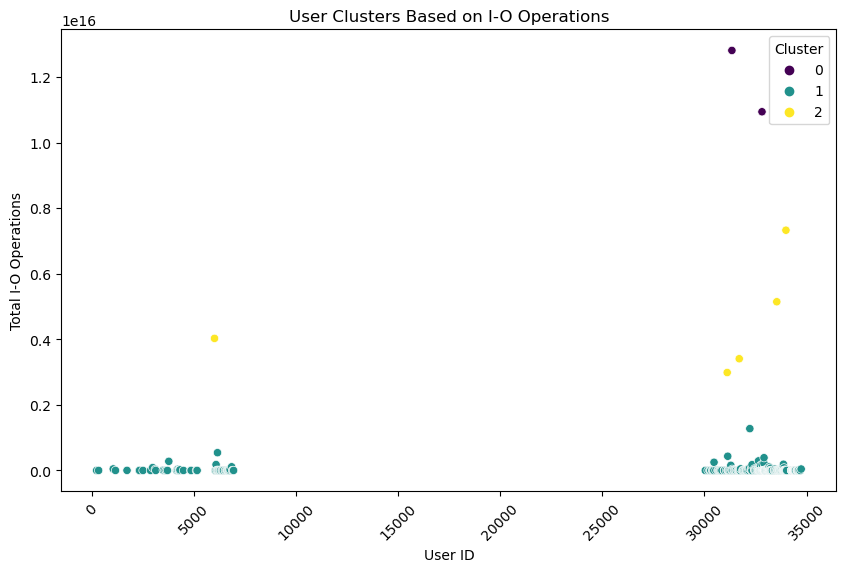

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=user_io_summary, x='USER_ID', y='TOTAL_IO_OPERATIONS', hue='cluster', palette='viridis')
plt.title('User Clusters Based on I-O Operations')
plt.xlabel('User ID')
plt.ylabel('Total I-O Operations')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.show()


## Time series

## Principle Component analysis

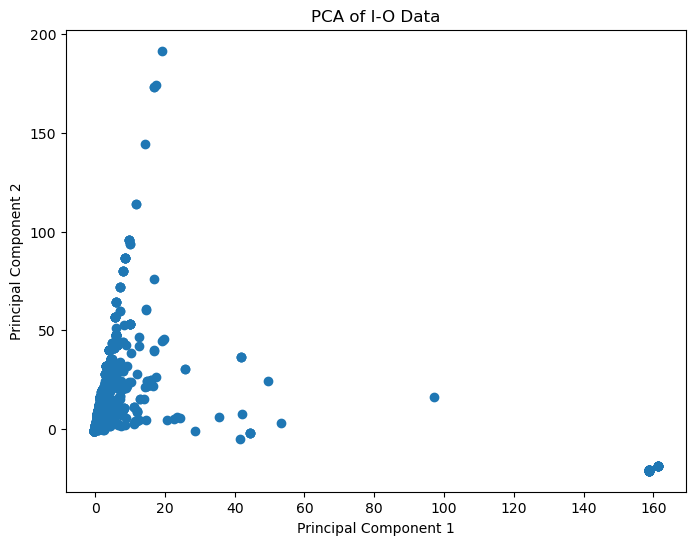

[0.10074505 0.08133254]


In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Normalize the data
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df[existing_io_columns])

# Initialize PCA - Here we are reducing to 2 components for easy visualization
pca = PCA(n_components=2)

# Fit PCA on the normalized data
principal_components = pca.fit_transform(df_normalized)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Visualize the first two principal components
plt.figure(figsize=(8,6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of I-O Data')
plt.show()

# Explained variance ratio can tell us how much information is captured by each principal component
print(pca.explained_variance_ratio_)


In [17]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

io_columns = [col for col in df.columns if 'TOTAL' in col] 

df_io = df[io_columns]

df_io = df_io.select_dtypes(include=[np.number])

# Check for any missing values in the dataframe
df_io = df_io.dropna()

# Define a pipeline that includes scaling and PCA
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('pca', PCA(n_components=0.9))  # Keep 90% of variance
])

# Fit the pipeline to the I-O data
pipeline.fit(df_io)

# Transform the data
df_transformed = pipeline.transform(df_io)

# Extract the PCA part of the pipeline
pca = pipeline.named_steps['pca']

explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance: {explained_variance}")

# Create a new DataFrame for the PCA-transformed data
df_pca = pd.DataFrame(df_transformed, columns=[f'PC{i+1}' for i in range(df_transformed.shape[1])])

print(df_pca.head())


Explained Variance: [0.10157986 0.06287138 0.05177606 0.04531129 0.03245242 0.02900628
 0.0269859  0.0249882  0.02426726 0.02185766 0.02113285 0.01990316
 0.01806837 0.01789483 0.01703494 0.01599622 0.01400574 0.01379544
 0.01348049 0.0130379  0.01238766 0.0123164  0.01219831 0.01131582
 0.01065753 0.01026417 0.01011936 0.00967129 0.00934893 0.00915988
 0.0090238  0.00889547 0.00868757 0.00852556 0.00815165 0.00801755
 0.00784809 0.00781201 0.0075466  0.00743724 0.00726649 0.00694844
 0.00684029 0.00678554 0.00672786 0.00662929 0.0065368  0.00646877
 0.0063479  0.00614049 0.00600857 0.00586791 0.00574219 0.00557386
 0.00551122 0.00520564 0.00519458 0.00508642 0.0049281  0.0047935
 0.00467623]
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.335649 -0.540302  0.086088 -0.006587 -0.030379 -0.672266 -0.127323   
1 -0.336471 -0.543921  0.082787 -0.006391 -0.030390 -0.672778 -0.127108   
2 -0.336531 -0.544078  0.082685 -0.006396 -0.030380 -0.672794 -0.127122  

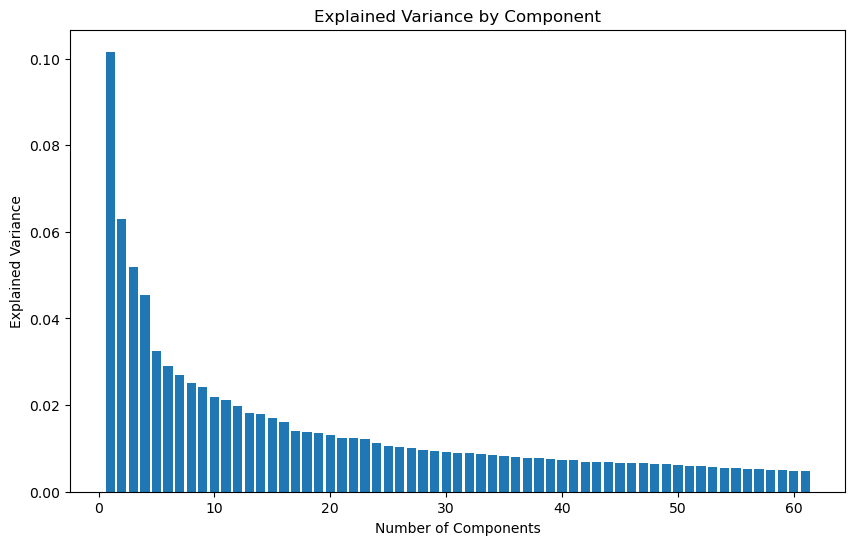

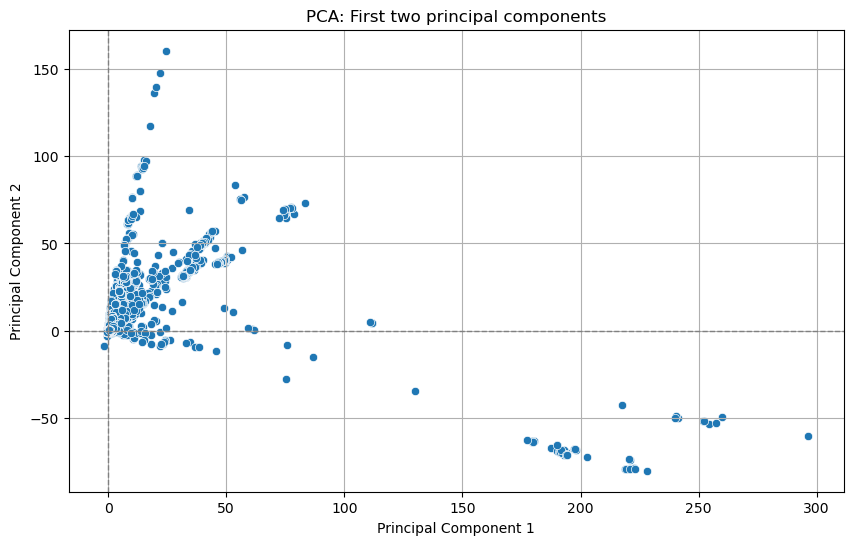

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plot the explained variance to choose the number of components to visualize
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.title('Explained Variance by Component')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show()

# Typically, we visualize the first two components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'])

plt.title('PCA: First two principal components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.axhline(0, color='grey', lw=1, ls='--')
plt.axvline(0, color='grey', lw=1, ls='--')
plt.grid(True)

plt.show()


In [19]:
# Assuming 'pca' is your fitted PCA model and 'df_io' contains the original features
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.components_.shape[0])], index=df_io.columns)

# Show the loadings for the first few principal components
print(loadings.head())


                         PC1       PC2       PC3       PC4       PC5  \
TOTAL_POSIX_OPENS   0.070398  0.115369 -0.077217  0.135593 -0.096404   
TOTAL_POSIX_READS   0.044552 -0.009310  0.030880  0.314353 -0.185654   
TOTAL_POSIX_WRITES  0.007891 -0.002438  0.011666  0.179295  0.391499   
TOTAL_POSIX_SEEKS   0.139144 -0.065686  0.061288  0.064042 -0.033357   
TOTAL_POSIX_STATS   0.040831  0.066250 -0.052963  0.131521 -0.096739   

                         PC6       PC7       PC8       PC9      PC10  ...  \
TOTAL_POSIX_OPENS  -0.008988  0.117861 -0.014277 -0.063236  0.029653  ...   
TOTAL_POSIX_READS   0.017203 -0.126716 -0.045772 -0.025343 -0.002491  ...   
TOTAL_POSIX_WRITES -0.017268  0.047861  0.006128 -0.018958 -0.002312  ...   
TOTAL_POSIX_SEEKS  -0.011246  0.141603  0.132403  0.305119  0.026401  ...   
TOTAL_POSIX_STATS  -0.022163  0.145754  0.078662 -0.047185 -0.035947  ...   

                        PC52      PC53      PC54      PC55      PC56  \
TOTAL_POSIX_OPENS  -0.086815  0.